# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(input_layer)
    x = keras.layers.Dense(units=128, activation="relu")(input_layer)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    

    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-3, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

opts= ['sgd','rmsprop','adagrad','adam']


In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for opt in opts:
    for lr in LEARNING_RATE:

        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f and %s" % (lr, opt))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        if opt == 'sgd':
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
        elif opt == 'rmsprop':        
            optimizer =keras.optimizers.RMSprop(lr=lr, rho=0.9, epsilon=None, decay=0.0)
        elif opt == 'adam':
            optimizer = keras.optimizers.Adam(lr=lr)
        elif opt == 'adagrad':
            optimizer = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp--opt-%s-lr-%s" % (str(opt),str(lr))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

W0716 18:21:55.485693 11164 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0716 18:21:55.493702 11164 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0716 18:21:55.600687 11164 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 18:21:55.607696 11164 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v

Experiment with LR = 0.100000 and sgd


W0716 18:21:55.878713 11164 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


W0716 18:21:56.379722 11164 deprecation.py:323] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 347us/step - loss: 14.3520 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 11s 230us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 15s 294us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 13s 256us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 11s 213us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 10s 209us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 10s 208us/step - loss: 14.5063 - acc: 0.1000 -

Epoch 3/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.7675 - acc: 0.3865 - val_loss: 1.7456 - val_acc: 0.3939
Epoch 4/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.7244 - acc: 0.4013 - val_loss: 1.7084 - val_acc: 0.4066
Epoch 5/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.6919 - acc: 0.4123 - val_loss: 1.6795 - val_acc: 0.4166
Epoch 6/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.6633 - acc: 0.4247 - val_loss: 1.6562 - val_acc: 0.4258
Epoch 7/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.6383 - acc: 0.4323 - val_loss: 1.6355 - val_acc: 0.4305
Epoch 8/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.6172 - acc: 0.4404 - val_loss: 1.6187 - val_acc: 0.4419
Epoch 9/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.5970 - acc: 0.4481 - val_loss: 1.6018 - val_acc: 0.4440
Epoch 10/50
50000/50000 [=========

50000/50000 [==============================] - 9s 180us/step - loss: 2.2185 - acc: 0.1933 - val_loss: 2.2064 - val_acc: 0.1936
Epoch 6/50
50000/50000 [==============================] - 8s 160us/step - loss: 2.2008 - acc: 0.2038 - val_loss: 2.1898 - val_acc: 0.2077
Epoch 7/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.1850 - acc: 0.2162 - val_loss: 2.1749 - val_acc: 0.2208
Epoch 8/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.1708 - acc: 0.2249 - val_loss: 2.1613 - val_acc: 0.2295
Epoch 9/50
50000/50000 [==============================] - 8s 163us/step - loss: 2.1576 - acc: 0.2331 - val_loss: 2.1487 - val_acc: 0.2347
Epoch 10/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.1455 - acc: 0.2397 - val_loss: 2.1368 - val_acc: 0.2433
Epoch 11/50
50000/50000 [==============================] - 8s 170us/step - loss: 2.1340 - acc: 0.2467 - val_loss: 2.1258 - val_acc: 0.2507
Epoch 12/50
50000/50000 [==================

50000/50000 [==============================] - 14s 280us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 16s 325us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000: 14.5110 - a - ETA: 0s - los
Epoch 9/50
50000/50000 [==============================] - 16s 314us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 14s 271us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 12s 236us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 12s 232us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 12s 231us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc

Epoch 9/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.6428 - acc: 0.4196 - val_loss: 1.8496 - val_acc: 0.3485
Epoch 10/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.6276 - acc: 0.4236 - val_loss: 1.6514 - val_acc: 0.4111
Epoch 11/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.6124 - acc: 0.4318 - val_loss: 1.7615 - val_acc: 0.3803
Epoch 12/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.5987 - acc: 0.4346 - val_loss: 1.6560 - val_acc: 0.4070
Epoch 13/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.5915 - acc: 0.4373 - val_loss: 1.7114 - val_acc: 0.3933
Epoch 14/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.5797 - acc: 0.4407 - val_loss: 1.5877 - val_acc: 0.4398
Epoch 15/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.5688 - acc: 0.4451 - val_loss: 1.6099 - val_acc: 0.4283
Epoch 16/50
50000/50000 

Epoch 12/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.8011 - acc: 0.3799 - val_loss: 1.8031 - val_acc: 0.3745
Epoch 13/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.7917 - acc: 0.3837 - val_loss: 1.7951 - val_acc: 0.3772
Epoch 14/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.7828 - acc: 0.3875 - val_loss: 1.7862 - val_acc: 0.3817
Epoch 15/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.7749 - acc: 0.3890 - val_loss: 1.7803 - val_acc: 0.3739
Epoch 16/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.7675 - acc: 0.3907 - val_loss: 1.7710 - val_acc: 0.3881
Epoch 17/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.7603 - acc: 0.3945 - val_loss: 1.7657 - val_acc: 0.3832
Epoch 18/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.7534 - acc: 0.3977 - val_loss: 1.7599 - val_acc: 0.3903
Epoch 19/50
50000/50000 [

50000/50000 [==============================] - 9s 182us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 9s 177us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/50
50000/50000 [==============================] - 9s 187us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/50
50000/50000 [==============================] - 9s 176us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 9s 182us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 9s 177us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 9s 182us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/50
50000/50000 [

50000/50000 [==============================] - 10s 195us/step - loss: 1.6493 - acc: 0.4324 - val_loss: 1.6608 - val_acc: 0.4232
Epoch 17/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.6433 - acc: 0.4344 - val_loss: 1.6606 - val_acc: 0.4263
Epoch 18/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.6378 - acc: 0.4360 - val_loss: 1.6511 - val_acc: 0.4279
Epoch 19/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.6319 - acc: 0.4376 - val_loss: 1.6471 - val_acc: 0.4306
Epoch 20/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.6279 - acc: 0.4402 - val_loss: 1.6411 - val_acc: 0.4284
Epoch 21/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.6229 - acc: 0.4411 - val_loss: 1.6424 - val_acc: 0.4295
Epoch 22/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.6185 - acc: 0.4423 - val_loss: 1.6409 - val_acc: 0.4295
Epoch 23/50
50000/50000 [============

50000/50000 [==============================] - 9s 171us/step - loss: 2.1882 - acc: 0.2054 - val_loss: 2.1877 - val_acc: 0.2044
Epoch 20/50
50000/50000 [==============================] - 8s 167us/step - loss: 2.1848 - acc: 0.2071 - val_loss: 2.1845 - val_acc: 0.2051
Epoch 21/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.1816 - acc: 0.2090 - val_loss: 2.1814 - val_acc: 0.2061
Epoch 22/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.1785 - acc: 0.2105 - val_loss: 2.1784 - val_acc: 0.2077
Epoch 23/50
50000/50000 [==============================] - 9s 185us/step - loss: 2.1756 - acc: 0.2124 - val_loss: 2.1756 - val_acc: 0.2096
Epoch 24/50
50000/50000 [==============================] - 9s 171us/step - loss: 2.1727 - acc: 0.2138 - val_loss: 2.1728 - val_acc: 0.2101
Epoch 25/50
50000/50000 [==============================] - 8s 167us/step - loss: 2.1700 - acc: 0.2152 - val_loss: 2.1701 - val_acc: 0.2112
Epoch 26/50
50000/50000 [==============

50000/50000 [==============================] - 9s 178us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 9s 183us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 8s 165us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/50
50000/50000 [==============================] - 8s 165us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 25/50
50000/50000 [==============================] - 8s 164us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 26/50
50000/50000 [==============================] - 8s 169us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 27/50
50000/50000 [==============================] - 9s 174us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 28/50
50000/50000 [

50000/50000 [==============================] - 8s 167us/step - loss: 1.4620 - acc: 0.4829 - val_loss: 1.5676 - val_acc: 0.4396
Epoch 24/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.4550 - acc: 0.4857 - val_loss: 1.5085 - val_acc: 0.4682
Epoch 25/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.4458 - acc: 0.4876 - val_loss: 1.5258 - val_acc: 0.4535
Epoch 26/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.4461 - acc: 0.4919 - val_loss: 1.5301 - val_acc: 0.4627
Epoch 27/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.4451 - acc: 0.4897 - val_loss: 1.5347 - val_acc: 0.4572
Epoch 28/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.4430 - acc: 0.4912 - val_loss: 1.5243 - val_acc: 0.4617
Epoch 29/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.4375 - acc: 0.4919 - val_loss: 1.5160 - val_acc: 0.4653
Epoch 30/50
50000/50000 [==============

50000/50000 [==============================] - 9s 171us/step - loss: 1.6960 - acc: 0.4171 - val_loss: 1.7024 - val_acc: 0.4105
Epoch 27/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.6905 - acc: 0.4194 - val_loss: 1.6978 - val_acc: 0.4134
Epoch 28/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.6859 - acc: 0.4202 - val_loss: 1.6928 - val_acc: 0.4140
Epoch 29/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.6809 - acc: 0.4246 - val_loss: 1.6904 - val_acc: 0.4160
Epoch 30/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.6757 - acc: 0.4267 - val_loss: 1.6839 - val_acc: 0.4167
Epoch 31/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.6712 - acc: 0.4268 - val_loss: 1.6801 - val_acc: 0.4171
Epoch 32/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.6664 - acc: 0.4286 - val_loss: 1.6750 - val_acc: 0.4243
Epoch 33/50
50000/50000 [===========

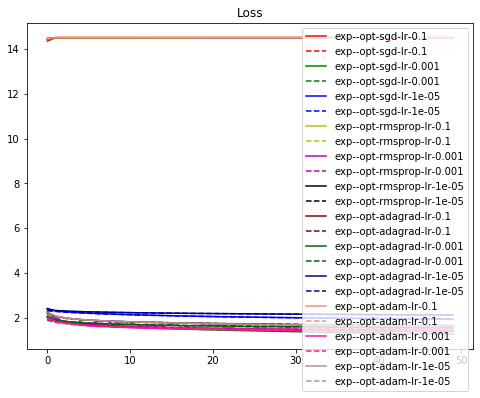

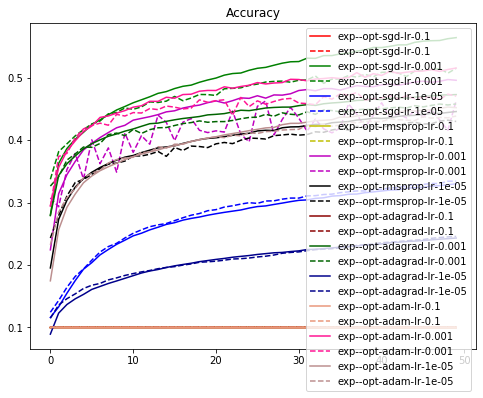

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","darkred","darkgreen","darkblue","darksalmon","deeppink","rosybrown"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()